<a href="https://colab.research.google.com/github/GurenSeiken/MetNumUN2023II/blob/main/Lab5/jtarazonaj_eslopezb_knivia_group20_CuibicEquation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modify [week_1_quadratic_Po_Shen_Loh.ipyn](https://colab.research.google.com/drive/15vXGB18_np6o0Rw8ZV4o08RTdCdDIdT0?usp=sharing) for

$$ ax^3+bx^+cx +d = 0$$

using Cubic equation – General cubic formula- [wikipedia](https://en.wikipedia.org/wiki/Cubic_equation)

Asuume $a=1$ then work wequations are of the form

$$ x^3+bx^+cx +d = 0$$

Including plots, expalnations, solution code and test cases



In [ ]:
#librerías
from re import U
import math
from decimal import Decimal
import numpy as np
import sympy as sp
from numpy import allclose

In [ ]:
def cubic(b,c,d,x):
    """Calulate the value of the  qubic equation, v = x**3 + bx**2 + c*x +d

    Parameters
    ----------
    b, c,d  : float
       Coefficients

    Returns
    -------
    v : float """

    # ... enter your code here ...
    v = (x**3) + b*(x**2) + c*x + d

    if (str(type(v))=="<class 'float'>" or str(type(v))=="<class 'numpy.float64'>"):
      epsilon = 0 - v
      if (epsilon < 1e-8):
        v = 0.0
    else:
      real = v.real
      img = v.imag
      if (-real < 1e-8):
        real = 0.0
      if (-img < 1e-8):
        img = 0.0
      if (real == 0 and img == 0):
        v = 0.0
      else:
        v = complex(real, img)
    return v

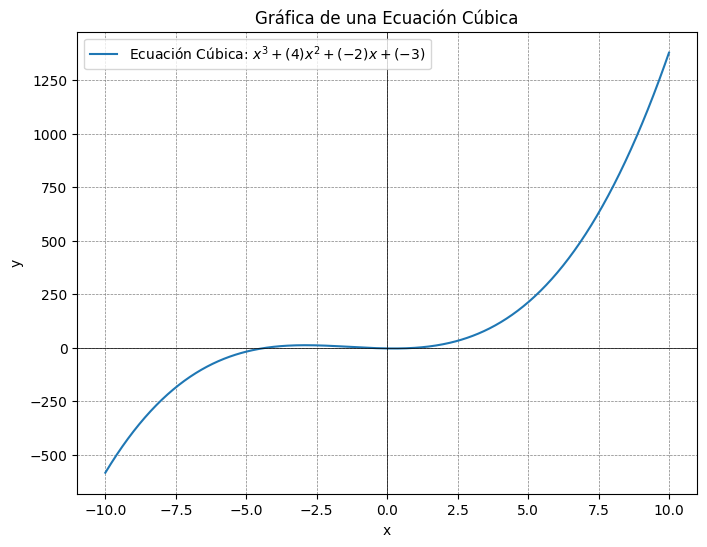

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_eq(b,c,d, x):
  return x**3 + b*x**2 + c*x + d

def plot_cubic(b, c, d):
  x = np.linspace(-10, 10, 400)
  y = cubic_eq(b,c,d,x)

  plt.figure(figsize=(8, 6))
  plt.plot(x, y, label='Ecuación Cúbica: $x^3 + ({})x^2 + ({})x + ({})$'.format(b,c,d))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Gráfica de una Ecuación Cúbica')
  plt.axhline(0, color='black',linewidth=0.5)
  plt.axvline(0, color='black',linewidth=0.5)
  plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
  plt.legend()
  plt.show()


plot_cubic(4, -2, -3)

In [ ]:
def aprox(a):
  a_r = round(a)
  if (a_r-a < 1e-15):
    return a_r
  else:
    return a

In [ ]:
def control(b,c,d,x1,x2,x3):
    x = sp.symbols('x')
    equation = x**3 + b*x**2 + c*x + d
    solutions = sp.solve(equation, x)
    n = len(solutions)
    if (n == 1):
      x1_n = solutions[0]
      x2_n = x1_n
      x3_n = x1_n
    elif (n==2):
      x1_n = solutions[0]
      x2_n = solutions[1]
      x3_n = x2_n
    else:
      x1_n = solutions[0]
      x2_n = solutions[1]
      x3_n = solutions[2]

    if (x1 != x1_n):
      x1 = complex(sp.re(x1_n), sp.im(x1_n))
    if (x2 != x2_n):
      x2 = complex(sp.re(x2_n), sp.im(x2_n))
    if (x3 != x3_n):
      x3 = complex(sp.re(x3_n), sp.im(x3_n))

    return x1,x2,x3

In [ ]:

def solve_cubic(b, c, d):
    """Solve a cubic equation, x^3 + bx^2 + cx + d = 0.

    Parameters
    ----------
    b, c, d : float
       Coefficients

    Returns
    -------
    x1, x2, x3 : float or complex
       Roots.
    """

    p = c + -((b ** 2) / 3.0)
    #q = ((2.0 * (b ** 3)) / 27.0) - ((b * c )/ 3.0) + d
    q = (2*(b**3) - 9*b*c + 27*d)/(27)
    #Δ = (q ** 2)  + ((4 *(p ** 3)) / 27.0)
    Δ = ((q/2)**(2)) + (p/3)**(3)
    #print("p, q, delta: ", p, q, Δ)

    if Δ > 0:
        # One real root, two complex roots
        root_term1 = (-q/2  + math.sqrt(Δ))
        if (root_term1 < 0):
          u = -(-root_term1)**(1/3)
        else:
          u = (root_term1)**(1/3)
        root_term2 = (-q/2  - math.sqrt(Δ))
        if (root_term2 < 0):
          v = -(-root_term2)**(1/3)
        else:
          v = (root_term2)**(1/3)
        x1 = u + v - (b / 3)
        x1 = aprox(x1)
        decimal_sum = aprox(Decimal(str(-0.5 * (u + v))) + Decimal(str(-b/3)))
        x2 = complex(decimal_sum, (math.sqrt(3) / 2) * (u - v))
        x3 = complex(decimal_sum, -(math.sqrt(3) / 2) * (u-v))

    elif Δ == 0:
        # Three real roots, two of them are equal
        pq = p*q
        if (pq == 0):
          x1 = -b/3
          x2 = -b/3
          x3 = -b/3
        else:
          x1 = ((-3*q)/(2*p)) - (b/3)
          x2 = ((-4*(p**2))/(q)) - (b/3)
          x3 = ((-4*(p**2))/(q)) - (b/3)
        '''root_term = -q / 2.0
        x1 = 2 * (root_term ** (1.0 / 3.0)) - b / 3.0
        x2 = -(root_term ** (1.0 / 3.0)) - b / 3.0
        x3 = -(root_term ** (1.0 / 3.0)) - b / 3.0'''
    else:
        # Three real roots
        '''root_term1 = (-q / 2.0 + math.sqrt(Δ)) ** (1.0 / 3.0)
        root_term2 = (-q / 2.0 - math.sqrt(Δ)) ** (1.0 / 3.0)

        x1 = root_term1 + root_term2 - b / 3.0
        x2 = complex(-(root_term1 + root_term2) / 2.0, (root_term1 - root_term2) * (math.sqrt(3) / 2.0) - b / 3.0)
        x3 = complex(-(root_term1 + root_term2) / 2.0, -(root_term1 - root_term2) * (math.sqrt(3) / 2.0) - b / 3.0)'''

        # Three real roots using De Moivre's formula
        θ = (-(p**3)/27)**(1/2)
        phi = math.acos(-q/(2*θ))
        #print("theta, phi: ", θ, phi)
        x1 = 2*(θ**(1/3))*math.cos(phi/3) - (b/3)
        x2 = 2*(θ**(1/3))*math.cos((phi/3)+(2/3)*math.pi) - (b/3)
        x3 = Decimal(str(2*(θ**(1/3))*math.cos((phi/3)+(b/3)*math.pi))) - Decimal(str(b/3))
        x3 = float(x3)
        #x1 = 2.0 * math.pow(r, 1/3) * math.cos(θ/3) - b / 3.0
        #x2 = 2.0 * math.pow(r, 1/3) * math.cos((θ + 2.0 * math.pi) / 3) - b / 3.0
        #x3 = 2.0 * math.pow(r, 1/3) * math.cos((θ + 4.0 * math.pi) / 3) - b / 3.0

    #print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))
    '''if ((allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0)) == False):
      coefficients = [1, b, c, d]
      x1, x2, x3 = np.roots(coefficients)'''
    x1, x2, x3 =  control(b,c,d,x1,x2,x3)

    return x1, x2, x3

'''b = -8
c = -5
d = -3
x1, x2, x3 = solve_cubic(b, c, d)
print("Roots: ", x1, x2, x3)
print(cubic(b, c, d, x1))
print(cubic(b, c, d, x2))
print(cubic(b, c, d, x3))'''


'b = -8\nc = -5\nd = -3\nx1, x2, x3 = solve_cubic(b, c, d)\nprint("Roots: ", x1, x2, x3)\nprint(cubic(b, c, d, x1))\nprint(cubic(b, c, d, x2))\nprint(cubic(b, c, d, x3))'

Bulit test cases that include

$$x^3 =1,$$

$$(x-1)^3 = x^3 - 3 x^2 + 3 x - 1,$$

$$(x-1)(x-i)(x+i) = x^3 - x^2 + x - 1, $$
three real diferent roots,  roots in the last digits of the group members, root of mtiuplicity two, and complex roots with small and large $b$.

**Last digits: Esteban Lopez(9), Javier Tarazona(7), Kevin Nivia(1)**

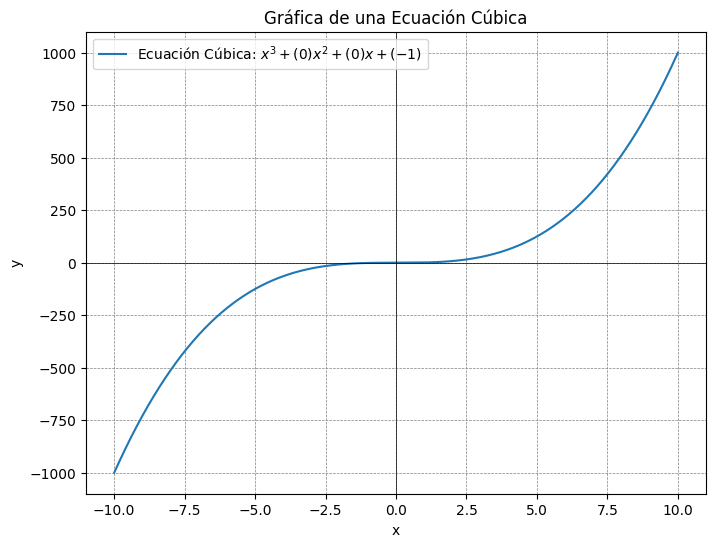

In [ ]:
plot_cubic(0,0,-1)

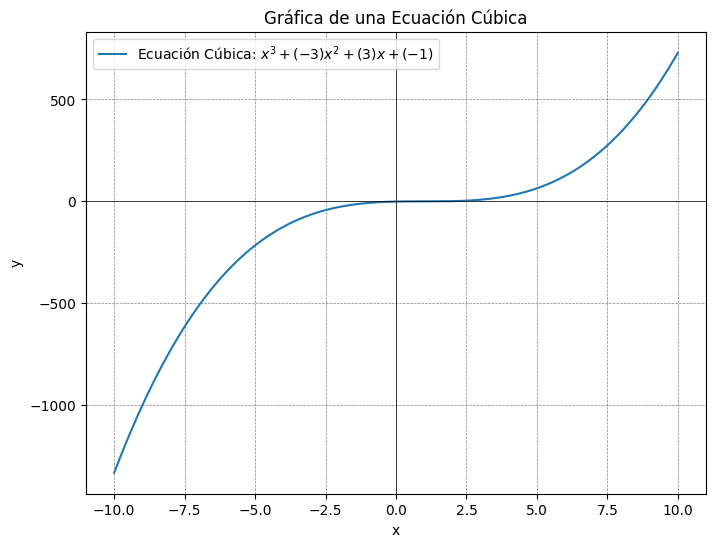

In [ ]:
plot_cubic(-3,3,-1)

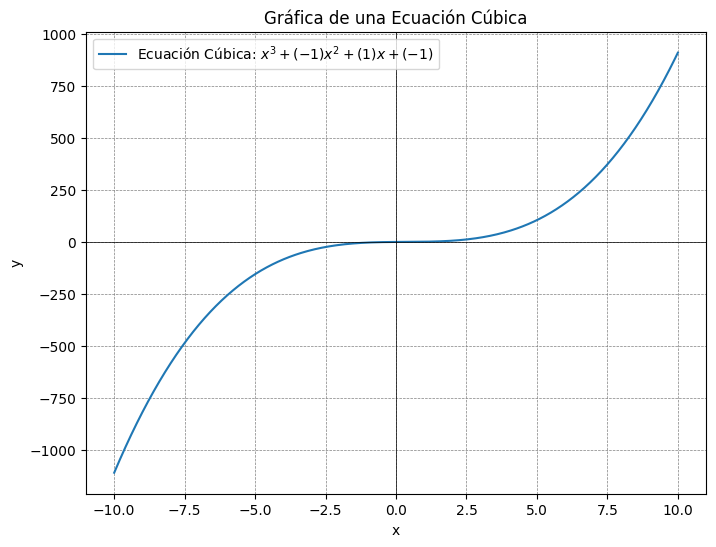

In [ ]:
plot_cubic(-1,1,-1)

In [ ]:
variants = [{'b': 0.0, 'c': 0.0, 'd': 0.0},
            {'b': -3.0, 'c': 3.0, 'd':-1.0},
            {'b': -1.0, 'c': 1.0, 'd':-1.0},
            {'b': -8.0, 'c': -5.0, 'd':-3.0},
            {'b': 0.0, 'c': 0.0, 'd':-1.0},
            {'b': -17.0, 'c': 79.0, 'd':-63.0},]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print("Roots: ", x1, x2, x3)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

Roots:  -0.0 -0.0 -0.0
True
Roots:  1.0 1.0 1.0
True
Roots:  1 -1j 1j
True
Roots:  8.620390899112605 (-0.31019544955630274-0.5017876479918116j) (-0.31019544955630274+0.5017876479918116j)
True
Roots:  1 (-0.5-0.8660254037844386j) (-0.5+0.8660254037844386j)
True
Roots:  (1+0j) (7+0j) (9+0j)
True


 Publish the notebook in as **pperezp_groupN_CubicEquation.ipynb** at **MetNumUN2023II/Lab5** and submit only the code of **solve_cubic(b, c,d)** in UNcode Quiz Cubic Equation.